In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, confusion_matrix

In [3]:
#reading dataset
df = pd.read_csv("selectedfeatures.csv")   # Replace with your dataset
X = df.drop("num", axis=1)  # Features
y = df["num"]

In [4]:
#standarizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


K-Means

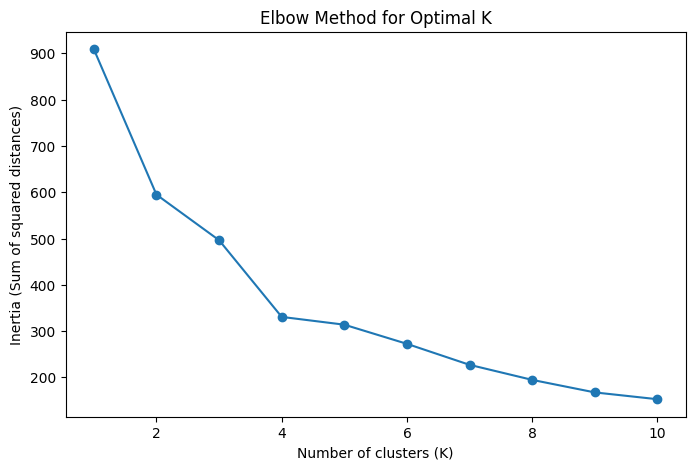

In [5]:
#elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
#plotting the elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [7]:
#choosing optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
#getting rand score for comparing later
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
print(f"K-Means Adjusted Rand Index: {ari_kmeans:.4f}")

K-Means Adjusted Rand Index: 0.2834


Hierarchical Clustering

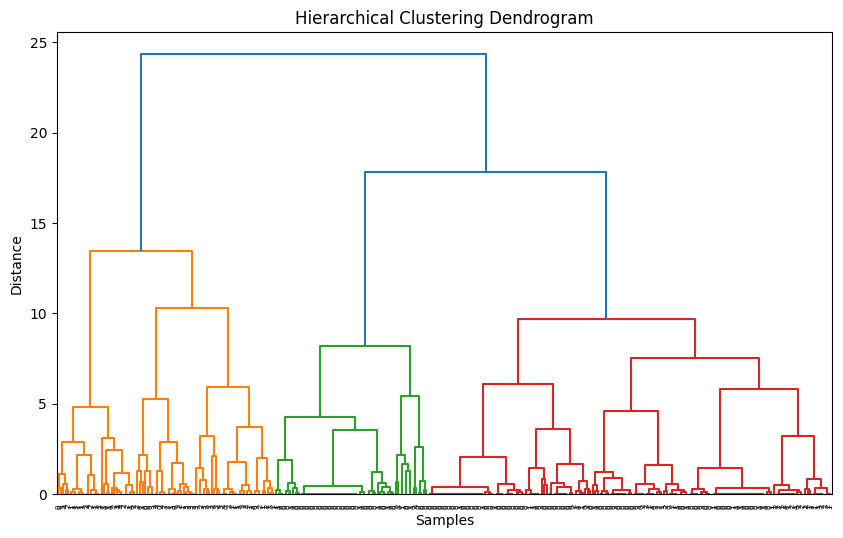

In [8]:
linked = linkage(X_scaled, method='ward')
#plotting dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=y.values,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [10]:
#agglo clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
agglo_labels = agglo.fit_predict(X_scaled)

#getting rand
ari_agglo = adjusted_rand_score(y, agglo_labels)
print(f"Hierarchical Clustering Adjusted Rand Index: {ari_agglo:.4f}")


Hierarchical Clustering Adjusted Rand Index: 0.1687
